### Wstęp do Uczenia Maszynowego - Projekt
##### Bartosz Chudek 327426

In [1]:
# import potrzebnych bibliotek i modułów

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Zbiór danych

In [2]:
# wczytanie danych

X_train = pd.read_csv("data/artifical_train_data.csv")
y_train = pd.read_csv("data/artifical_train_labels.csv")

X_test = pd.read_csv("data/artifical_test_data.csv")


#### 1.1 Eksploracja danych

In [3]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,500,441,400,445,519,447,479,484,549,424,...,436,477,496,458,454,526,563,448,518,454
1,535,454,513,437,502,471,506,490,371,441,...,519,484,500,460,493,497,489,462,489,500
2,473,469,527,487,478,461,454,438,419,532,...,537,492,467,480,449,474,481,464,463,523
3,490,480,518,453,487,468,454,473,533,536,...,518,487,485,457,460,465,445,468,511,470
4,443,472,504,511,481,487,497,469,416,559,...,511,472,483,502,481,514,513,483,474,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,511,485,601,516,522,449,479,469,305,500,...,588,484,523,483,478,486,464,493,472,496
1496,463,513,459,506,486,480,484,544,434,572,...,480,476,489,477,467,484,510,460,472,483
1497,504,450,441,501,476,435,484,501,582,485,...,459,475,468,440,481,487,423,468,445,491
1498,457,483,503,499,465,505,509,485,467,410,...,513,466,499,482,467,483,459,447,500,473


In [4]:
y_train

,Class
0,2
1,1
2,1
3,1
4,1
...,...
1495,1
1496,2
1497,1
1498,2


----
#### Sprawdzenie czy zbiory X_train i y_train zawierają braki danych oraz sprawdzenie typów danych X_train

In [5]:
# sprawczenie, czy zbór X zawiera braki danych
X_train.isna().sum().iloc[np.where(X_train.isna().sum() > 0)]

Series([], dtype: int64)

In [6]:
# sprawczenie, czy zbór y zawiera braki danych
print(y_train.isna().sum())

Class    0
dtype: int64


In [7]:
# sprawdzenie typów danych kolumn w X

np.unique(X_train.dtypes)[0]

dtype('int64')

W X_train występuja tylko zmienne numeryczne. Ani X_train, ani y_train nie zawieraja braków danych.

In [8]:
X_test.isna().sum().iloc[np.where(X_test.isna().sum() > 0)]

Series([], dtype: int64)

----

#### Sprawdzenie skośności i występowani obserwacji odstajacych w zmiennych objaśniających.

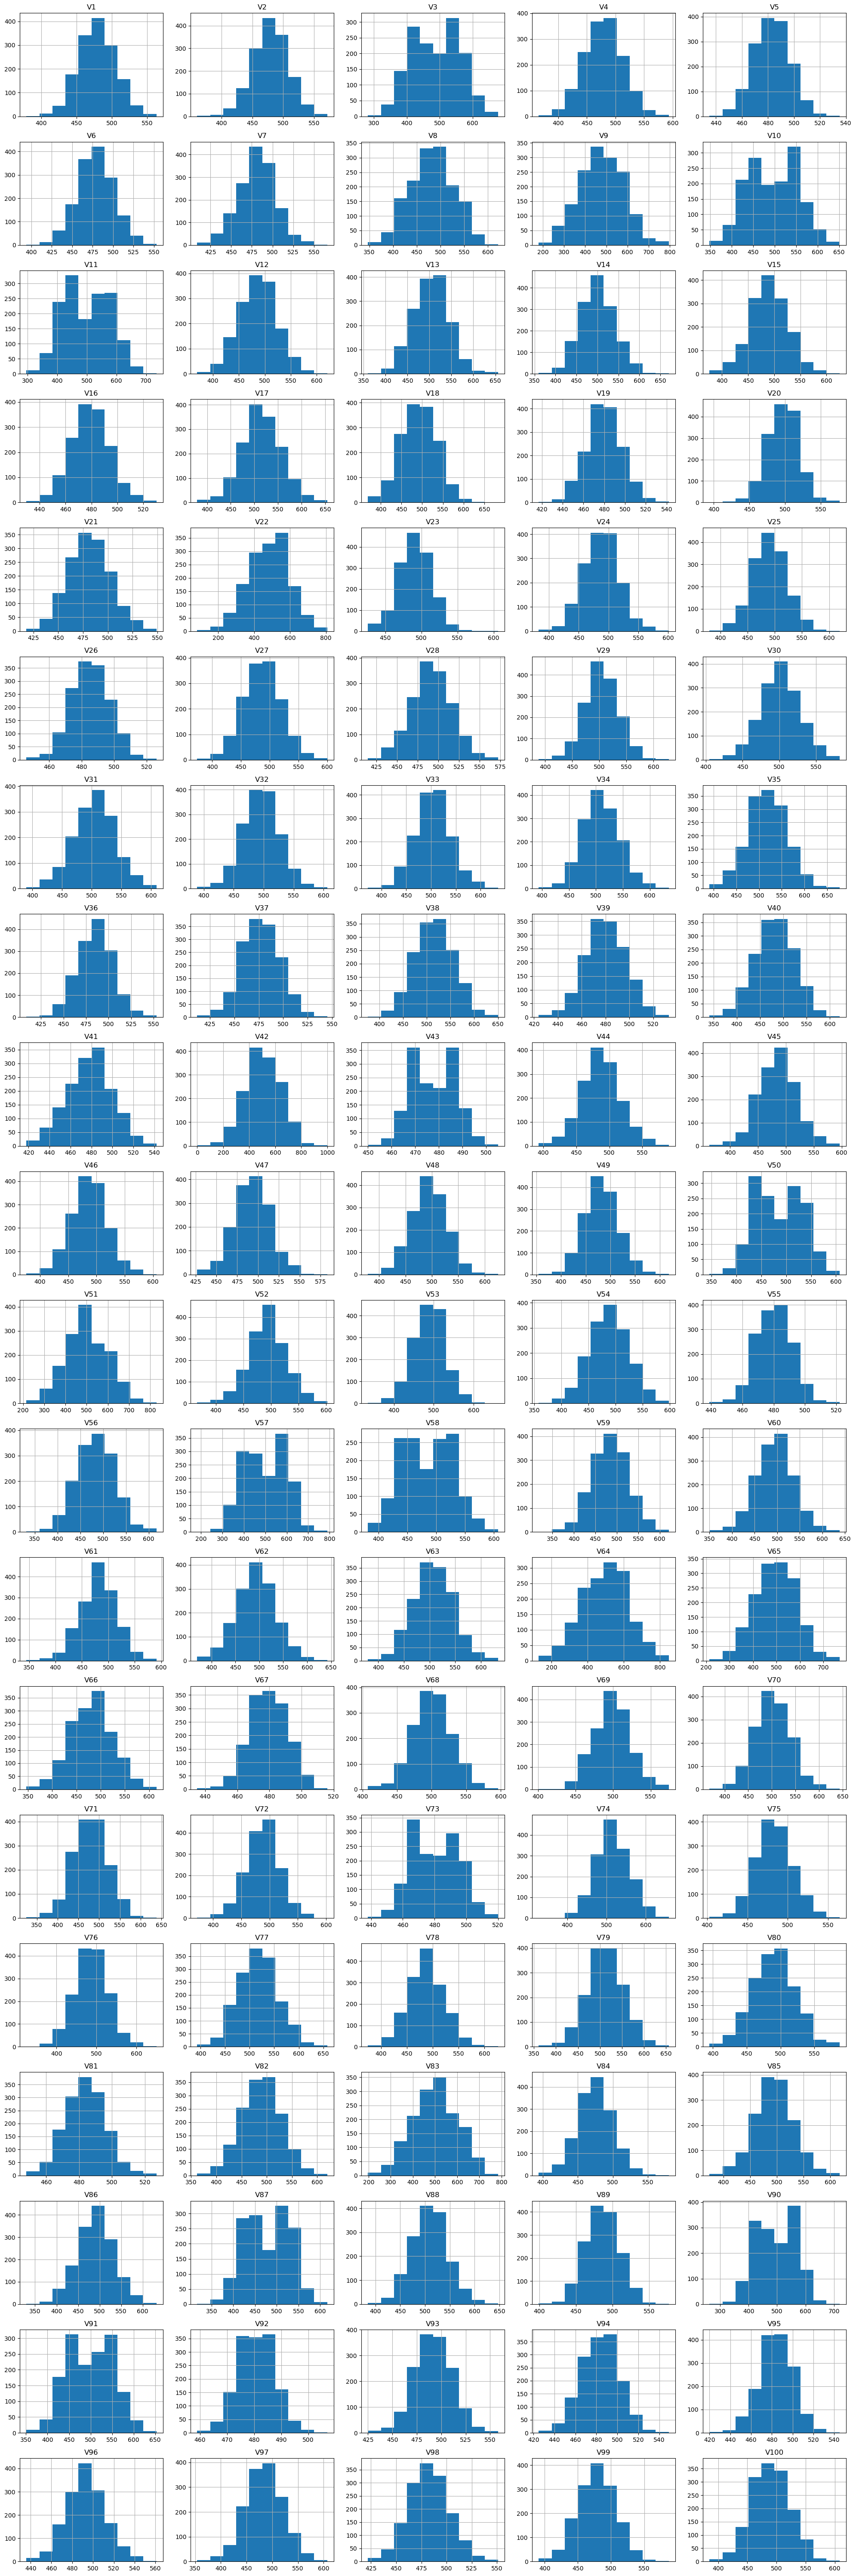

In [9]:
cols = X_train.columns[:100]

fig, axes = plt.subplots(20, 5, figsize=(20, 60))

axes = axes.ravel()

for i in range(100):
    X_train[cols[i]].hist(ax=axes[i])
    axes[i].set_title(cols[i])

plt.tight_layout()
plt.show()

<AxesSubplot:>

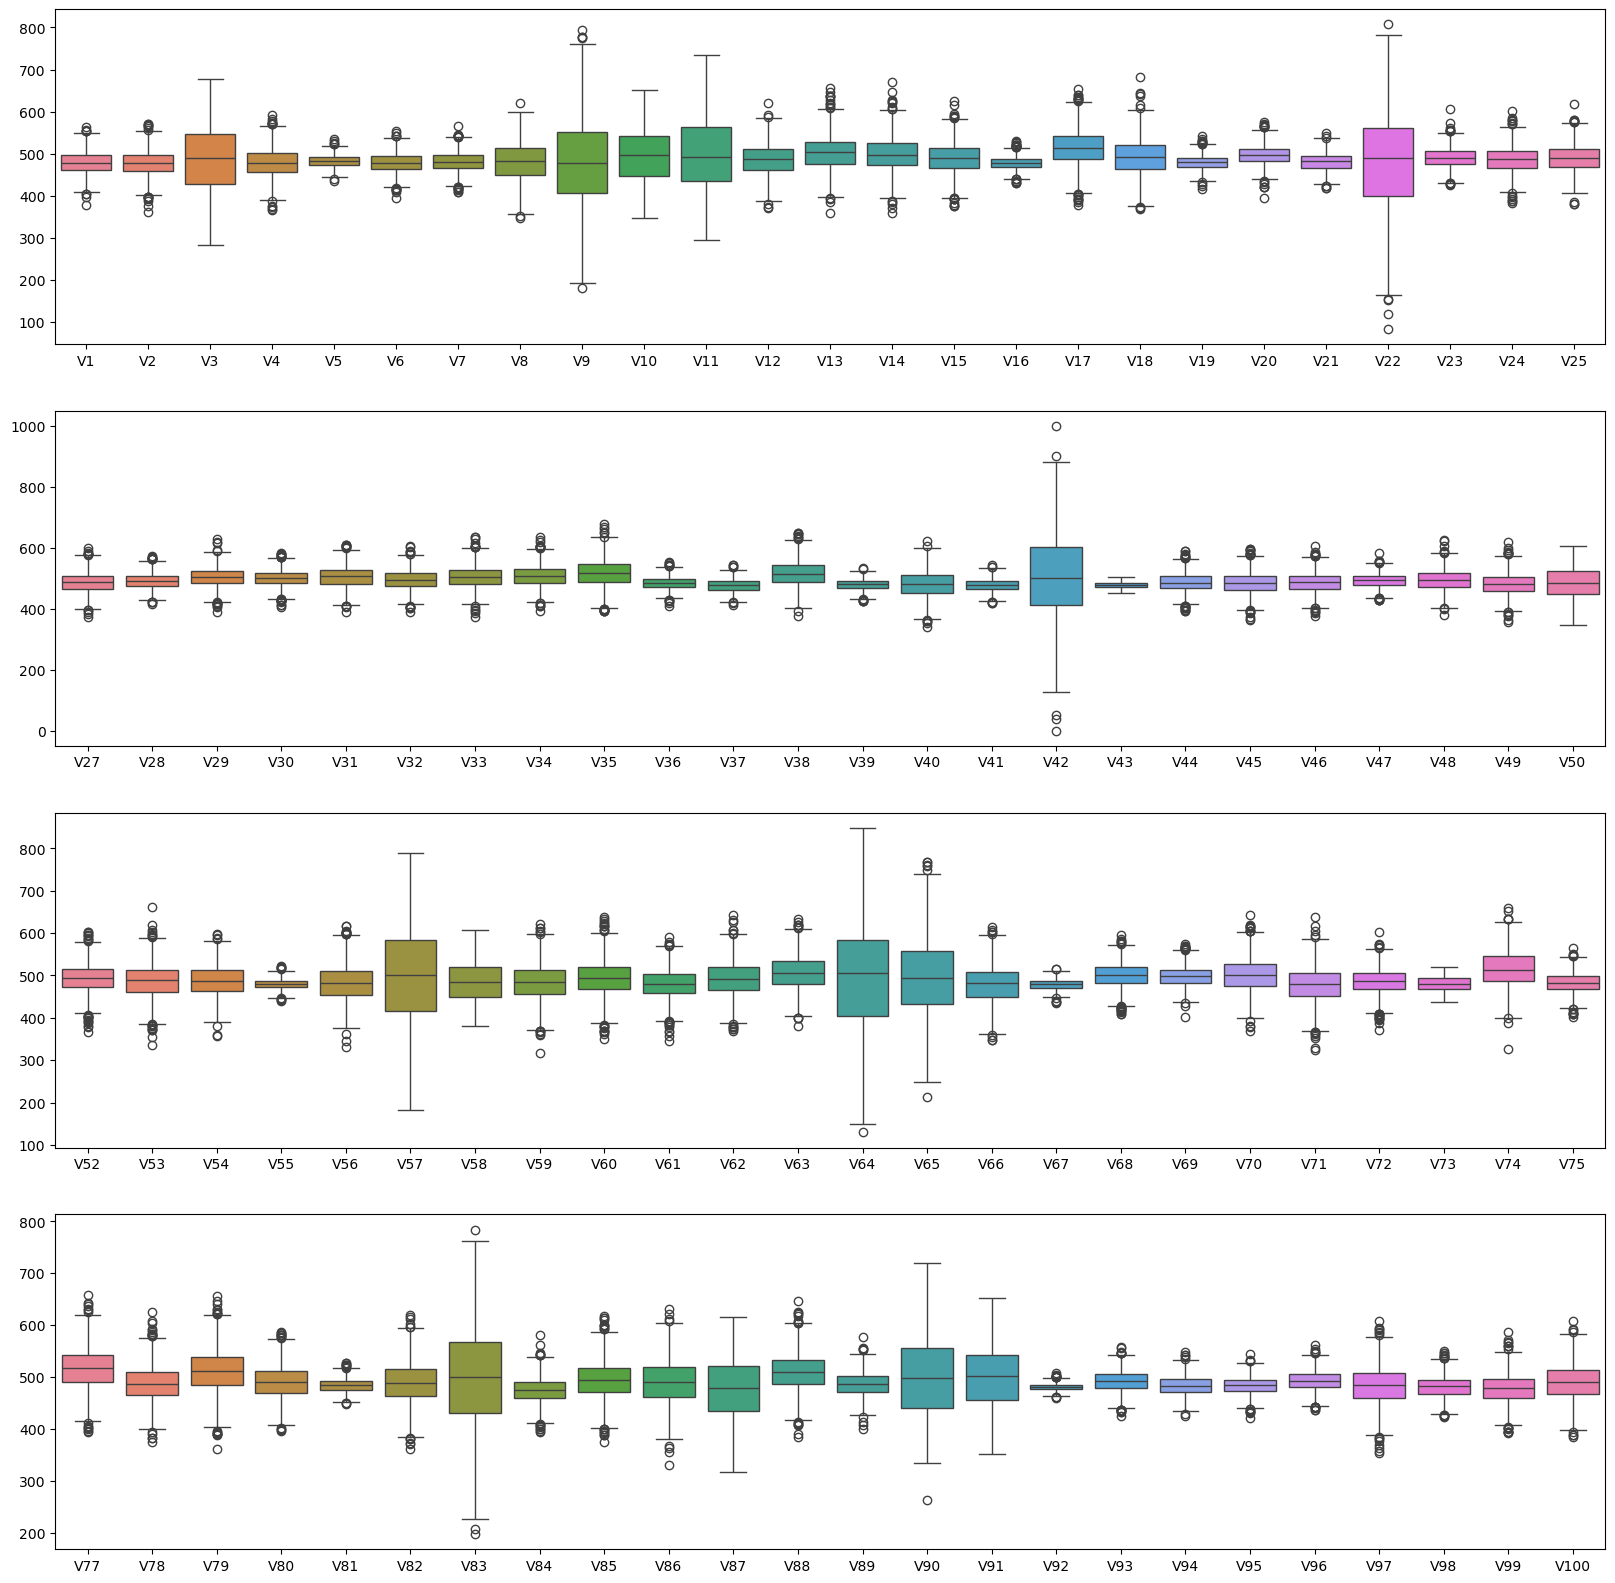

In [10]:
figs, axes = plt.subplots(4, 1, figsize=(20, 20))
sns.boxplot(X_train[X_train.columns[0:25]], ax = axes[0])
sns.boxplot(X_train[X_train.columns[26:50]], ax = axes[1])
sns.boxplot(X_train[X_train.columns[51:75]], ax = axes[2])
sns.boxplot(X_train[X_train.columns[76:100]], ax = axes[3])

Analizując histogramy można dojść do wniosku, że rozkład żadnej ze zmiennych objasniajacych nie jest skośny. Większość z nich posiada jednak obserwacje odstające, lecz praktycznie żadne z nich nie są bardzo ekstremalne. 

----

#### Sprawdzenie zrównoważenia klas


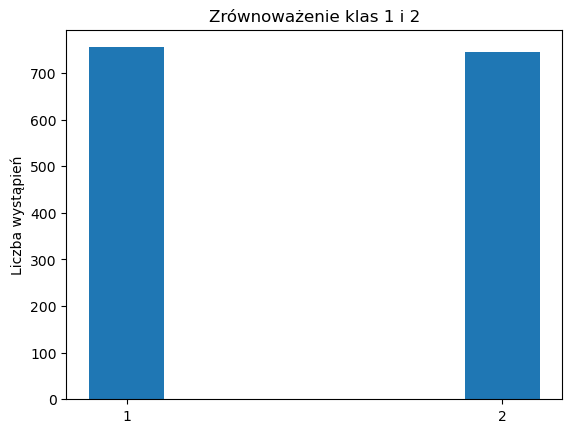

In [11]:
plt.hist(y_train, bins=[0.5, 1.5, 2.5], rwidth=0.2)
plt.xticks([1, 2])
plt.ylabel('Liczba wystąpień')
plt.title('Zrównoważenie klas 1 i 2')
plt.show()

In [12]:
y_train.value_counts()/sum(y_train.value_counts())

Class
1        0.503333
2        0.496667
dtype: float64

Klasy  1 i 2  sa bardzo zrównoważone.

----